In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [656]:
df = pd.read_csv('/content/sample_data/Dataset.csv')
print("The shape of the data: ", df.shape)
df.head()

The shape of the data:  (606, 14)


,Position,Company,Location,Industry,Posted On,Extracted On,Job Type,Qualification,Job Description,Job Id,Experience,Start Date,End Date,Source
0,Data Science Intern,Amazon,"Seattle, WA",Retail/Ecommerce,NaN,NaN,NaN,"Enrolled in Master’s or Ph.D. degree in math, ...",We are looking for motivated data scientists w...,Job ID: A1235288,"machine-learning methodologies,\nclustered dat...",NaN,NaN,https://www.amazon.jobs/en/jobs/1235288/data-s...
1,IT Intern - BI & Analytics - Data Analytics,Costco Wholesale,NaN,Retail/Ecommerce,NaN,NaN,NaN,maintaining a GPA of 3.0 or higher\nstudents c...,Costco’s IT Division is inviting students curr...,NaN,"Costco warehouse, Ecommerce or retail experience",NaN,NaN,https://www.glassdoor.com/job-listing/it-inter...
2,"Intern, Data Analytics-SoCal",Avanade,"Seattle, WA",Management consulting company,NaN,NaN,NaN,College Junior-standing with target graduation...,Responsibilities may include:\nSupport project...,NaN,•Experience with at least one key analytics to...,10-week summer (June-August),NaN,https://www.glassdoor.co.in/job-listing/intern...
3,"Data Scientist, Analytics, Intern\n",\nFacebook,"Seattle, WA",Social Media Advertising,NaN,NaN,NaN,"Currently has, or is in the process of obtaini...",Perform large-scale data analysis to extract u...,NaN,Experience in solving analytical problems usin...,NaN,NaN,https://www.facebook.com/careers/v2/jobs/55929...
4,"Summer Intern, Data Science\n\n",Just - Evotec Biologics,"Seattle, WA",Biotechnology Company,NaN,NaN,NaN,"B.Sc. in molecular and computer science, cellu...",Just is seeking a motivated bachelor or master...,243034373-2,"Experience with data science, data management ...",NaN,NaN,https://westcoast-jobs.com/jobs/summer-intern-...


In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         606 non-null    object
 1   Company          606 non-null    object
 2   Location         603 non-null    object
 3   Industry         606 non-null    object
 4   Posted On        8 non-null      object
 5   Extracted On     8 non-null      object
 6   Job Type         8 non-null      object
 7   Qualification    193 non-null    object
 8   Job Description  605 non-null    object
 9   Job Id           92 non-null     object
 10  Experience       603 non-null    object
 11  Start Date       27 non-null     object
 12  End Date         26 non-null     object
 13  Source           594 non-null    object
dtypes: object(14)
memory usage: 66.4+ KB


In [658]:
# the data have three duplicated data, so we have to remove them first
print("The number of duplicated data: ", df[df.duplicated()].shape[0])
df[df.duplicated()]

The number of duplicated data:  3


,Position,Company,Location,Industry,Posted On,Extracted On,Job Type,Qualification,Job Description,Job Id,Experience,Start Date,End Date,Source
242,Software - Video Games Engineering Internship ...,Tesla,"Bellevue, WA",Manufacturing,NaN,NaN,NaN,NaN,Many students will be limited to part-time dep...,NaN,NA-Feb 2020 Data,NaN,NaN,https://www.indeed.com/rc/clk?jk=3ebfeda5d9214...
248,Summer 2021 Intern - Software Engineer,Salesforce,"Bellevue, WA 98006 (Somerset area)",Internet,NaN,NaN,NaN,NaN,Academic or professional/internship experience...,NaN,NA-Feb 2020 Data,NaN,NaN,https://www.indeed.com/rc/clk?jk=488fd0eb5913f...
249,Summer 2021 Intern - Software Engineer,Salesforce,"Bellevue, WA 98006 (Somerset area)",Internet,NaN,NaN,NaN,NaN,Academic or professional/internship experience...,NaN,NA-Feb 2020 Data,NaN,NaN,https://www.indeed.com/rc/clk?jk=488fd0eb5913f...


In [659]:
# after removing three duplicated data, the shape of the data converts to (603, 14)
df.drop_duplicates(inplace = True)
print("The shape of the data: ", df.shape)
df.info()

The shape of the data:  (603, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 605
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         603 non-null    object
 1   Company          603 non-null    object
 2   Location         600 non-null    object
 3   Industry         603 non-null    object
 4   Posted On        8 non-null      object
 5   Extracted On     8 non-null      object
 6   Job Type         8 non-null      object
 7   Qualification    193 non-null    object
 8   Job Description  602 non-null    object
 9   Job Id           92 non-null     object
 10  Experience       600 non-null    object
 11  Start Date       27 non-null     object
 12  End Date         26 non-null     object
 13  Source           591 non-null    object
dtypes: object(14)
memory usage: 70.7+ KB


# 1. Analyze the data in the "Position" column and describe some of the characteristics of this data. Mention the top 3 Positions that are in high demand?

In [660]:
# return the count of each unique Position: 452
df_pos = df['Position'].value_counts().rename_axis('Position').reset_index(name='Freq')
df_pos.head()

,Position,Freq
0,Senior Software Engineer,23
1,Data Science Intern,9
2,Software Engineer Intern,9
3,Data Analyst Intern,8
4,Web Developer,8


In [661]:
# top 3 Positions that are in high demand
df['Position'].value_counts().head(3).index.tolist()

['Senior Software Engineer', 'Data Science Intern', 'Software Engineer Intern']

# 2. How many different companies have a job listing in the given dataset? What is the average count of jobs listed per company?

In [662]:
# the count of unique job position in each company
df_com = df['Company'].value_counts().rename_axis('Company').reset_index(name='Freq')
df_com.head()

,Company,Freq
0,Microsoft,85
1,Amazon.com Services LLC,23
2,Seattle IT,12
3,Russell Investments,11
4,T-Mobile,11


In [663]:
# the count of unique companies: 293
len(pd.unique(df['Company']))

293

In [664]:
# the average count of jobs listed per company
round(np.average(df['Company'].value_counts().to_numpy()), 3)

2.058

# 3. Which industry is associated with the most job listings? Which has the least?


In [665]:
# the count of unique job position in each insustry
df_ind = df['Industry'].value_counts().rename_axis('Industry').reset_index(name='Freq')
df_ind.head()

,Industry,Freq
0,Computer Software,129
1,Information Technology & Servicess,62
2,Software & Tech Services,58
3,Retail/Ecommerce,29
4,Recruiting and Staffing,24


In [666]:
# the industry with the most job listings: Computer Software 
max_job_ind = df_ind['Freq'].max()
print("The count of most job listings: ", max_job_ind)
df_ind[df_ind['Freq'] == max_job_ind]['Industry'].tolist()

The count of most job listings:  129


['Computer Software']

In [667]:
# the industry with the least job listings: many industries
min_job_ind = df_ind['Freq'].min()
print("The count of least job listings: ", min_job_ind)
df_ind[df_ind['Freq'] == min_job_ind]['Industry'].tolist()

The count of least job listings:  1


['Software life Science',
 'Healthcare software company',
 'Aerospace Computer Vision National Security',
 'Apparel & Fashion',
 'Application performance management',
 'B2B Marketing Agency',
 'Immigration',
 'Foreign Limited Liability Company',
 'Hotel',
 'Personal Consumer Services',
 'Pulp and Paper Industry',
 'Architecture & Planning',
 'Social Services',
 'Education Domain/E-Learning',
 'Non-profit organization',
 'Legal',
 'Venture Capital & Private Equity',
 'Building Materials',
 'Business Services',
 'Hospitality and Leisure Domain',
 'Computer Networking',
 'Human Resources',
 'Investment Management',
 'Logistics and Supply Chain',
 'Applied Science and Technology Development',
 'Bioscience Research',
 'Defense & Space']

# 4. Which location is associated with the most job listings? What is the average number of listings per location?

In [668]:
# the count of unique job position based on location 
df_loc = df['Location'].value_counts().rename_axis('Location').reset_index(name='Freq')
df_loc.head()

,Location,Freq
0,Seattle WC,193
1,"Seattle, WA",162
2,"Redmond, WA 98052 (Overlake area)",40
3,"Redmond, WA",29
4,"Bellevue, WA",29


In [669]:
# the industry with the most job listings: Computer Software 
max_job_loc = df_loc['Freq'].max()
print("The count of most job listings: ", max_job_loc)
df_loc[df_loc['Freq'] == max_job_loc]['Location'].tolist()

The count of most job listings:  193


['Seattle WC']

In [670]:
# the average count of jobs listed per location
round(np.average(df['Location'].value_counts().to_numpy()), 3)

9.524

# 5. If you had to identify all the jobs that require data skills, how would you identify them? How many jobs require data skills? 

In [671]:
# number of experience whose value is null: 3
num_nan_exp = len(df[df['Experience'].isnull()]['Experience'])
# number of experience whose value is Na, NA, or NA-Feb 2020 Data: 410
num_no_exp = len(df[df['Experience'].notnull() & df['Experience'].str.lower().str.startswith('n')]['Experience'])
total_num_no_exp = df.shape[0] - num_nan_exp - num_no_exp
print("Number of jobs which require data skills: ", total_num_no_exp)

Number of jobs which require data skills:  193


# 6. Based on the "Qualification" column, identify job listings that require applicants who are either pursuing or have completed a Bachelor's Degree. What is the count of such jobs?

In [672]:
# add a column called "Is_Bachelor" to store the result of whether the job requires a bachelor degree
df['Is_Bachelor'] = df['Qualification'].notnull() & df['Qualification'].str.lower().str.contains('bachelor|bs|ba|b.s|b.a|undergraduate')
# df['Is_Bachelor'] = df['Qualification'].apply(lambda x: x.contains('bs'))
len(df[df['Is_Bachelor'] == True]['Is_Bachelor'])

121

# 7. Perform an Exploratory Data Analysis and present the summary of your analysis. 
A. Analyze the data set and summarize the main characteristics

B. Use statistical graphics and data visualization methods to present your insights

C. Identify further questions related to the provided dataset that a database manager or a data analyst should explore. 


I only show B in this part, since the answer of A and C can be seen in the data_analysis.pdf.

[Text(0.5, 51.00000000000006, 'Number of job listings')]

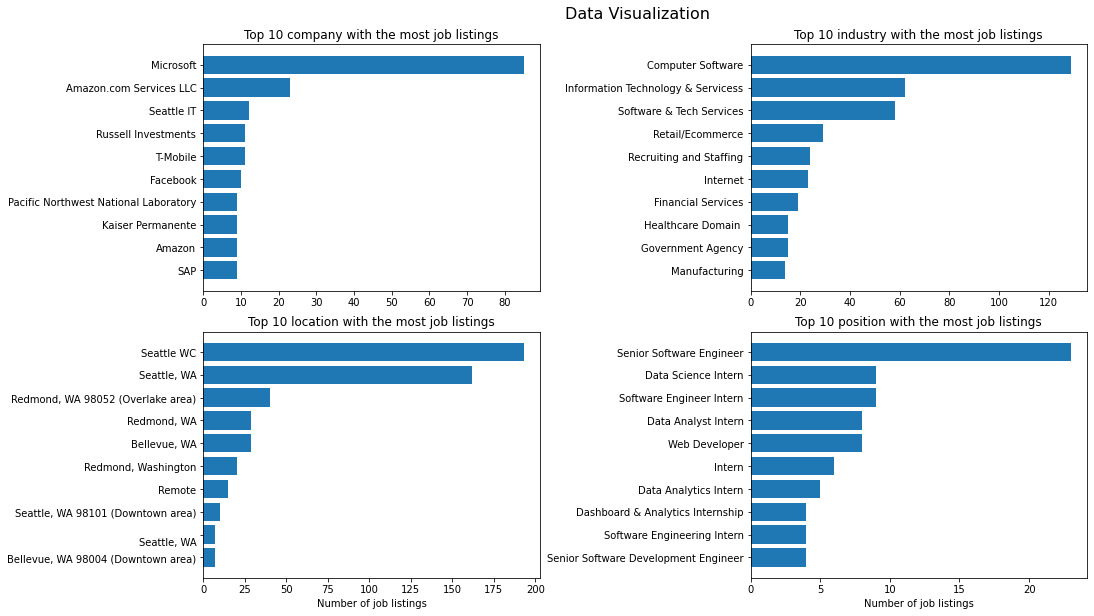

In [674]:
# import matplotlib.pyplot as plt
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(13,8))
fig.tight_layout(w_pad=18.0, h_pad=2.0)
fig.suptitle('Data Visualization', fontsize=16, y=1.04)

axs[0,0].set_title('Top 10 company with the most job listings')
axs[0,0].barh(df_com.head(10)['Company'], df_com.head(10)['Freq'])
axs[0,0].invert_yaxis()

axs[0,1].set_title('Top 10 industry with the most job listings')
axs[0,1].barh(df_ind.head(10)['Industry'], df_ind.head(10)['Freq'])
axs[0,1].invert_yaxis()

axs[1,0].set_title('Top 10 location with the most job listings')
axs[1,0].barh(df_loc.head(10)['Location'], df_loc.head(10)['Freq'])
axs[1,0].invert_yaxis()
axs[1,0].set(xlabel='Number of job listings')

axs[1,1].set_title('Top 10 position with the most job listings')
axs[1,1].barh(df_pos.head(10)['Position'], df_pos.head(10)['Freq'])
axs[1,1].invert_yaxis()
axs[1,1].set(xlabel='Number of job listings')
# plt.show()